# Titanic Tutorial Copy2

## previously....

in the previous notebook, I followed two tutorial written in korean
- (titanic tutorial1)https://kaggle-kr.tistory.com/17?category=868316
- (titanic tutorial2)https://kaggle-kr.tistory.com/18?category=868316
Including part 1 and some of tutorial 2. I've prepared dataset for machine learning.
But it is not completed.... I'll continue to copy from 4.4. one-hot encoding.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

%matplotlib inline
#Initiallize libraries and matplotlib.pyplot style like previous notebook (titanic_tutorial_copy1)

#let's check out dataframe before we start....
df_train=pd.read_csv('../input/titanic-tutorical-copy1to2/df_train1.csv')
df_test=pd.read_csv('../input/titanic-tutorical-copy1to2/df_test1.csv')

print(df_train)
print(df_test)

     Survived  Pclass  Sex      Fare  Embarked  FamilySize  Initial  Age_cat
0           0       3    1  1.981001         2           2        2        2
1           1       1    0  4.266662         0           2        3        3
2           1       3    0  2.070022         2           1        1        2
3           1       1    0  3.972177         2           2        3        3
4           0       3    1  2.085672         2           1        2        3
..        ...     ...  ...       ...       ...         ...      ...      ...
886         0       2    1  2.564949         2           1        2        2
887         1       1    0  3.401197         2           1        1        1
888         0       3    0  3.154870         2           4        1        2
889         1       1    1  3.401197         0           1        2        2
890         0       3    1  2.047693         1           1        2        3

[891 rows x 8 columns]
     Pclass  Sex      Fare  Embarked  FamilySize  In

They have corresponding 7 columns and train set has 'survived' column, as I expected.  Unfortunately, there is NaN value found. Why does it happened? 



In [2]:
#df_train.describe()
df_train.describe()
df_test.describe()
#df_test_origin=pd.read_csv('../input/titanic/test.csv')
#df_test_origin.describe()

,Pclass,Sex,Fare,Embarked,FamilySize,Initial,Age_cat
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000,417.000000
mean,2.265550,0.636364,2.947868,1.401914,1.839713,1.887290,2.606715
std,0.841838,0.481622,1.006656,0.854496,1.519072,0.749523,1.302274
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,0.000000,2.066331,1.000000,1.000000,2.000000,2.000000
50%,3.000000,1.000000,2.670985,2.000000,1.000000,2.000000,3.000000
75%,3.000000,1.000000,3.449988,2.000000,2.000000,2.000000,3.000000
max,3.000000,1.000000,6.238967,2.000000,11.000000,4.000000,6.000000


It looks like I forgot to fill up some test.csv columns..... as 'age' feature is filled up with average of 'initial' feature, I can fill up again as average does not changed. Also 'fare' can be filled up as the average of pclass.

In [3]:

for i in range(418):
    if df_test.Age_cat.isnull().values[i]==True:
        print('age is null ',i, df_test['Initial'][i])
    if df_test.Initial.isnull().values[i]==True:
        print('Initial is null ',i,df_test['Sex'][i],df_test['Age_cat'][i])
df_test[['Initial','Age_cat']].groupby(['Initial'], as_index=True).mean()
print(df_test.groupby('Initial').mean())


age is null  96 3.0
Initial is null  414 0 3.0
           Pclass  Sex      Fare  Embarked  FamilySize   Age_cat
Initial                                                         
0.0      2.714286  1.0  3.112730  1.380952    3.952381  0.285714
1.0      2.443038  0.0  2.927526  1.430380    1.936709  1.822785
2.0      2.307377  1.0  2.744583  1.454918    1.450820  2.852459
3.0      1.833333  0.0  3.566570  1.208333    2.430556  3.281690
4.0      1.000000  1.0  4.404990  2.000000    3.000000  5.000000


In [4]:
df_test['Age_cat'][96]=3.0
df_test['Initial'][414]=3.0 #chosen 3.0 from sex and age
df_test.describe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Pclass,Sex,Fare,Embarked,FamilySize,Initial,Age_cat
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.636364,2.947868,1.401914,1.839713,1.889952,2.607656
std,0.841838,0.481622,1.006656,0.854496,1.519072,0.750600,1.300853
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,0.000000,2.066331,1.000000,1.000000,2.000000,2.000000
50%,3.000000,1.000000,2.670985,2.000000,1.000000,2.000000,3.000000
75%,3.000000,1.000000,3.449988,2.000000,2.000000,2.000000,3.000000
max,3.000000,1.000000,6.238967,2.000000,11.000000,4.000000,6.000000


## One-hot encoding Embarked and Initial.

I'll not discuss One-hot encoding works. Anyway it can be easily done with get_dummies of pandas.

In [5]:
df_train=pd.get_dummies(df_train, columns=['Embarked'],prefix='Embarked')
df_test=pd.get_dummies(df_test, columns=['Embarked'], prefix = 'Embarked')

In [6]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')
df_train.describe()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Embarked_0,Embarked_1,Embarked_2,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,2.893846,1.904602,2.510662,0.188552,0.086420,0.725028,0.044893,0.208754,0.595960,0.142536,0.007856
std,0.486592,0.836071,0.477990,1.002899,1.613459,1.324212,0.391372,0.281141,0.446751,0.207186,0.406647,0.490981,0.349796,0.088337
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,2.068177,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,2.670985,1.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,3.433987,2.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,3.000000,1.000000,6.238967,11.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


final dataset check-up before building machine learning model

In [7]:
print(df_train.describe())
print(df_test.describe())

         Survived      Pclass         Sex        Fare  FamilySize     Age_cat  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642    0.647587    2.893846    1.904602    2.510662   
std      0.486592    0.836071    0.477990    1.002899    1.613459    1.324212   
min      0.000000    1.000000    0.000000    0.000000    1.000000    0.000000   
25%      0.000000    2.000000    0.000000    2.068177    1.000000    2.000000   
50%      0.000000    3.000000    1.000000    2.670985    1.000000    3.000000   
75%      1.000000    3.000000    1.000000    3.433987    2.000000    3.000000   
max      1.000000    3.000000    1.000000    6.238967   11.000000    6.000000   

       Embarked_0  Embarked_1  Embarked_2   Initial_0   Initial_1   Initial_2  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.188552    0.086420    0.725028    0.044893    0.208754    0.595960   
std      0.391372    0.2811

# Building machine learning model and prediction using the trained model

In [8]:
from sklearn.ensemble import RandomForestClassifier #randomforest모델을 쓴답니다.
from sklearn import metrics #제출 전 사전평가를 위해 사용한다고 합니다.
from sklearn.model_selection import train_test_split #역시 사전평가에 쓰일 데이터를 준비하는 것 같습니다.

In [9]:
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values
#결과를 알고 있는 train셋에서 임의로 일부를 떼어내 테스트 셋으로 사용, 모델의 성능을 예측해봅니다.

In [10]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [11]:
print('{}명 중 {}%의 생존을 맞춤.'.format(y_vld.shape[0],100*metrics.accuracy_score(prediction,y_vld)))

268명 중 81.71641791044776%의 생존을 맞춤.


## 4.3. Feature importance

어떤 feature가 생존률에 큰 영향을 줬는지 따져보는 것 같습니다.

## 4.4 Prediction on Test set

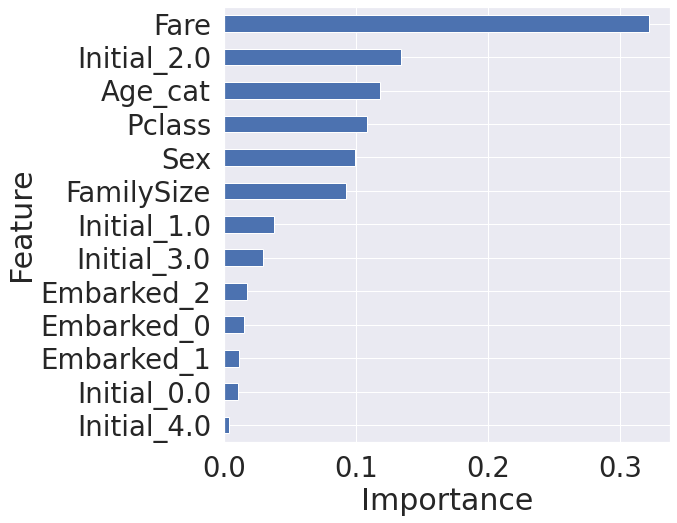

In [12]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

plt.figure(figsize=(8,8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## 4.4 Prediction on Test set

In [13]:
submission = pd.read_csv('../input/titanic/gender_submission.csv')

In [14]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [15]:
prediction = model.predict(X_test)
submission['Survived']=prediction
submission.to_csv('./my_first_submission.csv',index=False)

submission 파일을 만들 수 있었습니다.